## Z score based anomaly detection

In this step, we focus on identifying unusual patterns in the telemetry data, helping to flag potential issues with IoT devices. By calculating Z-scores for each metric, we can detect outliers—values that deviate significantly from typical behavior. Detecting these anomalies early allows for proactive maintenance and alerts on abnormal device conditions, which is crucial for ensuring smooth operations and preventing unexpected failures.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
%matplotlib inline

In [2]:
df_pd = pd.read_csv('cleaned_data.csv')
df_pd.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1970-01-01 00:00:01.594512094,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1970-01-01 00:00:01.594512094,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1970-01-01 00:00:01.594512098,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1970-01-01 00:00:01.594512099,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1970-01-01 00:00:01.594512101,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


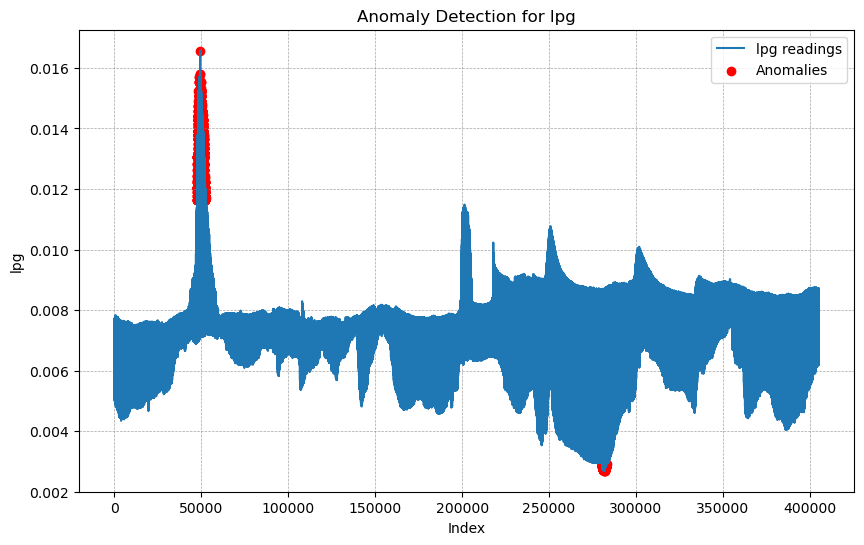

In [3]:
def plot_metric_with_anomalies(df, metric, z_threshold=3):
    """
    Identifies anomalies using Z-scores and plots a given metric using the index as the x-axis.

    Parameters:
        df (DataFrame): The main dataset.
        metric (str): The metric to analyze and plot.
        z_threshold (float): Threshold for Z-score to identify anomalies. Default is 3.
    """
   
    anomaly_metrics = {}
    
    for column in df.columns:
        if df[column].dtype in [float, int]:  # Only apply to numerical columns
            df[f'{column}_zscore'] = zscore(df[column])  # Calculate Z-score
            anomaly_metrics[column] = df[df[f'{column}_zscore'].abs() > z_threshold]  # Flag anomalies
    
    # Ensure the metric is in the dataframe
    if metric not in df.columns:
        raise ValueError(f"Metric '{metric}' is not in the dataframe columns.")
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[metric], label=f'{metric} readings')
    plt.scatter(anomaly_metrics[metric].index, anomaly_metrics[metric][metric], color='red', label='Anomalies')

    # Adding grid and labels
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.xlabel('Index')
    plt.ylabel(metric)
    plt.title(f'Anomaly Detection for {metric}')
    plt.legend()

    # Show the plot
    plt.show()

    
plot_metric_with_anomalies(df_pd, metric='lpg')

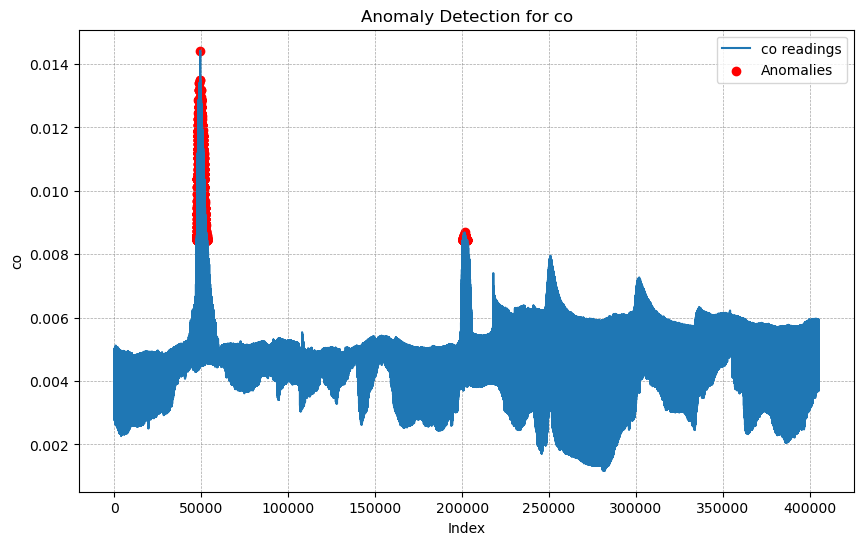

In [4]:
plot_metric_with_anomalies(df_pd, metric='co')

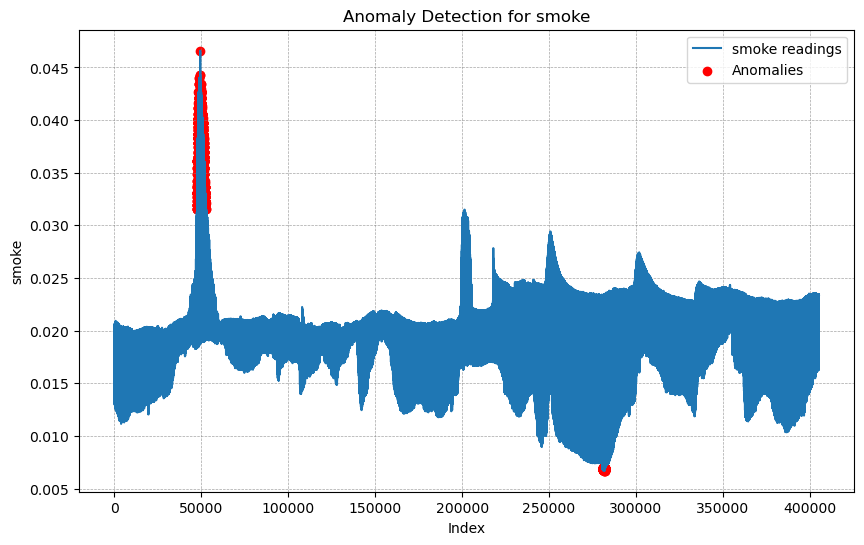

In [5]:
plot_metric_with_anomalies(df_pd, metric='smoke')

## Conclusion

In this analysis, we successfully applied anomaly detection techniques to our dataset using Z-scores to identify outliers across numerical columns. The primary goal was to detect unusual readings or potential data issues that could impact the quality and reliability of the dataset.

Anomaly Detection
We applied Z-score-based anomaly detection to all numerical columns. The Z-score is a statistical measure that quantifies the number of standard deviations a data point is from the mean. For this analysis, we set a Z-score threshold of 3, meaning any data point with an absolute Z-score greater than 3 was flagged as an anomaly. By calculating the Z-scores, we identified data points that significantly deviated from the expected patterns, highlighting potential outliers in the dataset.

Visualization
To visualize the anomalies, we plotted the readings of specific metrics alongside the anomalies. These plots allowed us to easily observe the deviations in key variables, providing insights into when and where anomalies occurred. In particular, we focused on an index range of 4000 to 6000 to zoom in on specific periods of interest.

Findings
The detected anomalies could indicate various issues, such as sensor malfunctions, external environmental factors, or unexpected events affecting the measurements. These outliers provide valuable insights into the reliability of the data and highlight areas that may require further investigation or intervention. By pinpointing these irregularities, we can make informed decisions about data cleaning or system improvements.

Next Steps
Moving forward, we suggest conducting a root cause analysis to investigate the anomalies further. It will be important to determine whether the anomalies represent genuine issues or if they are just noise in the data.

Overall, this analysis provides a strong foundation for anomaly detection, which can be extended and refined to offer more robust insights into the dataset and improve system reliability.